## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
project = pd.read_csv('./data/HR Employee Attrition.csv')
project

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Basic Check on data

In [3]:
project.shape

(1470, 35)

In [4]:
project.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
project["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [6]:
project.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
project.duplicated().sum().sum()

0

In [8]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Checking for outliers

In [9]:
num_project = project[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike',"PerformanceRating",
                        "MonthlyIncome"]]
num_project

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,MonthlyIncome
0,41,1102,94,5993,19479,11,3,5993
1,49,279,61,5130,24907,23,4,5130
2,37,1373,92,2090,2396,15,3,2090
3,33,1392,56,2909,23159,11,3,2909
4,27,591,40,3468,16632,12,3,3468
...,...,...,...,...,...,...,...,...
1465,36,884,41,2571,12290,17,3,2571
1466,39,613,42,9991,21457,15,3,9991
1467,27,155,87,6142,5174,20,4,6142
1468,49,1023,63,5390,13243,14,3,5390


In [10]:
num_project.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,PerformanceRating,MonthlyIncome
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,65.891156,6502.931293,14313.103401,15.209524,3.153741,6502.931293
std,9.135373,403.509100,20.329428,4707.956783,7117.786044,3.659938,0.360824,4707.956783
min,18.000000,102.000000,30.000000,1009.000000,2094.000000,11.000000,3.000000,1009.000000
25%,30.000000,465.000000,48.000000,2911.000000,8047.000000,12.000000,3.000000,2911.000000
50%,36.000000,802.000000,66.000000,4919.000000,14235.500000,14.000000,3.000000,4919.000000
75%,43.000000,1157.000000,83.750000,8379.000000,20461.500000,18.000000,3.000000,8379.000000
90%,50.000000,1356.000000,94.000000,13775.600000,24001.700000,21.000000,4.000000,13775.600000
95%,54.000000,1424.100000,97.000000,17821.350000,25431.900000,22.000000,4.000000,17821.350000
99%,58.310000,1485.000000,100.000000,19626.310000,26704.240000,25.000000,4.000000,19626.310000


# Dropping columns

In [11]:
project.drop(columns=['EmployeeCount','StandardHours'],axis ="column",inplace = True,errors ="ignore")# dropping the columns that are not changing
project

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


# Data visualiztion

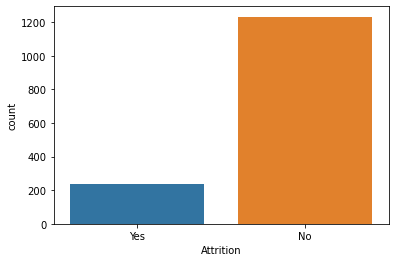

In [12]:
sns.countplot(x='Attrition', data = project)
plt.show()

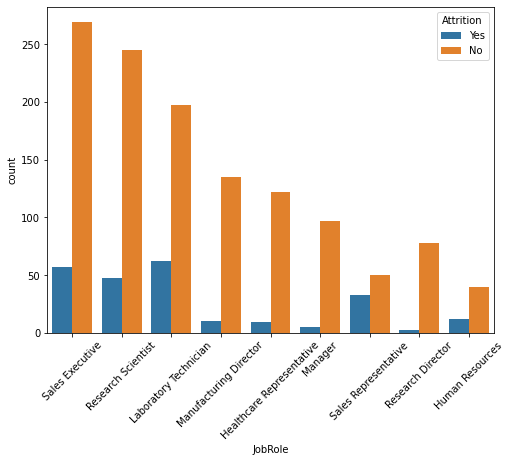

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobRole', hue='Attrition', data=project)
plt.xticks(rotation=45)
plt.show()

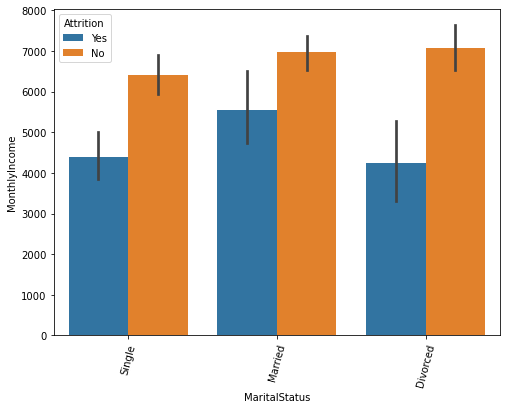

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x='MaritalStatus', y='MonthlyIncome', hue='Attrition', data=project)
plt.xticks(rotation=75)
plt.show()

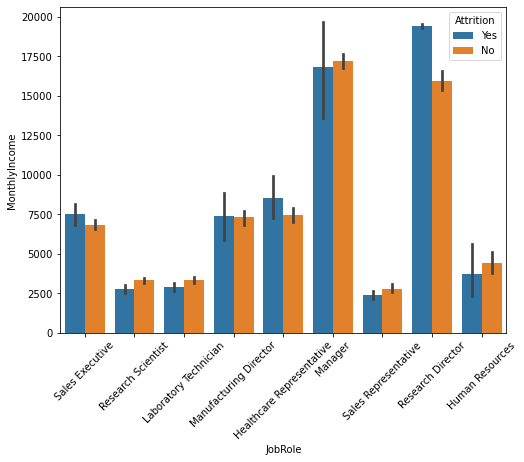

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='JobRole',  y='MonthlyIncome', hue='Attrition', data=project)
plt.xticks(rotation=45)
plt.show()

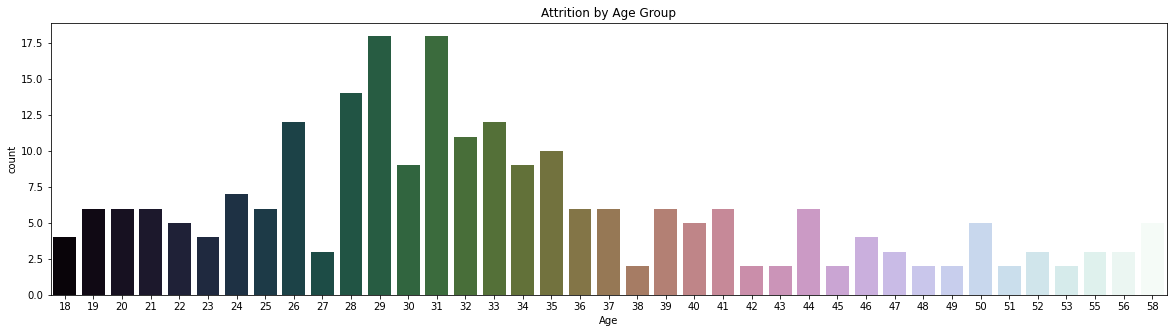

In [16]:
plt.figure(figsize=(20,5) )
sns.countplot(data=project[(project['Attrition'] == 'Yes')], x='Age', palette='cubehelix')
plt.title('Attrition by Age Group')
plt.show()

<Figure size 1800x1080 with 0 Axes>

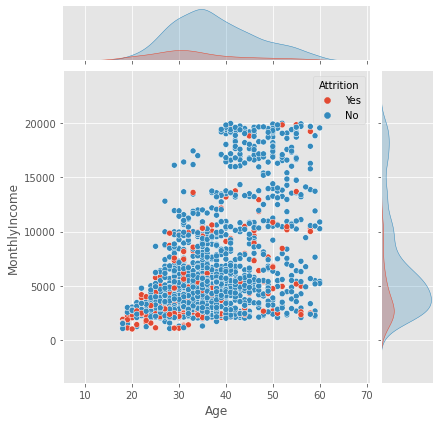

In [17]:
plt.figure(figsize=(25,15))
plt.style.use('ggplot')
sns.jointplot(x='Age', y='MonthlyIncome',hue = 'Attrition', data=project)
plt.show()

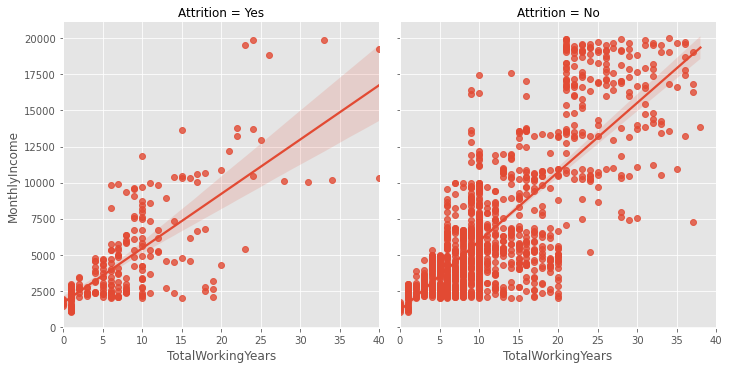

In [18]:
palette = sns.color_palette("rocket")
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = project, palette = palette, col = 'Attrition')
plt.show()

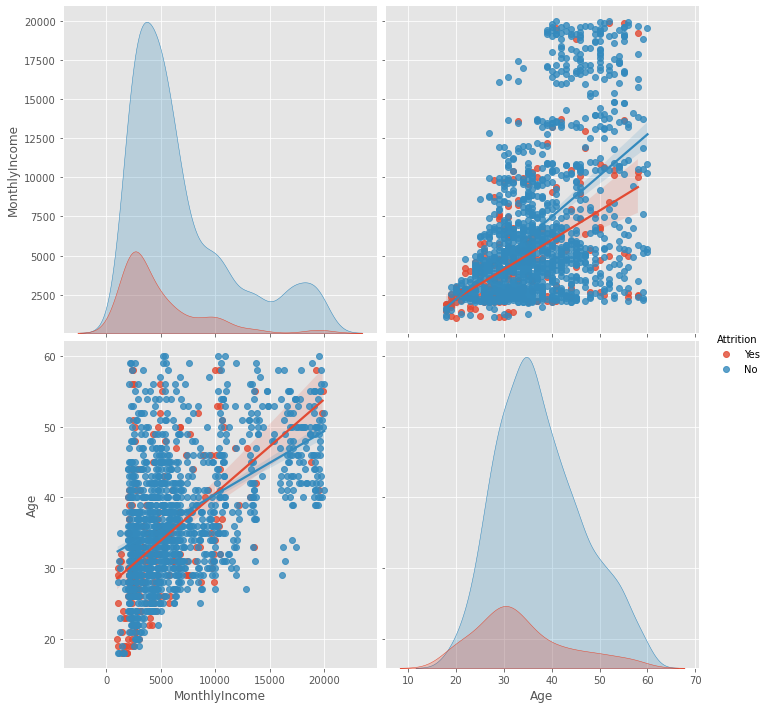

In [19]:
plt.style.use('ggplot')
sns.pairplot(project, vars=["MonthlyIncome", "Age"],hue="Attrition", kind = 'reg' ,height=5)

In [20]:
import altair as alt
from vega_datasets import data
alt.Chart(project).mark_boxplot().encode(x = 'TotalWorkingYears',y = 'MonthlyIncome',color = 'Attrition'
                                        ).properties(width = 800, height = 500)

alt.Chart(...)

In [21]:


line = alt.Chart(project).mark_line().encode(
    x = 'TotalWorkingYears',
    y = 'MonthlyIncome',
    color = 'mean(Attrition)'
).properties(width = 800, height = 500)

point = alt.Chart(project).mark_point().encode(
    x = 'TotalWorkingYears',
    y = 'MonthlyIncome'
).properties(width = 800, height = 500)

line + point 

alt.LayerChart(...)

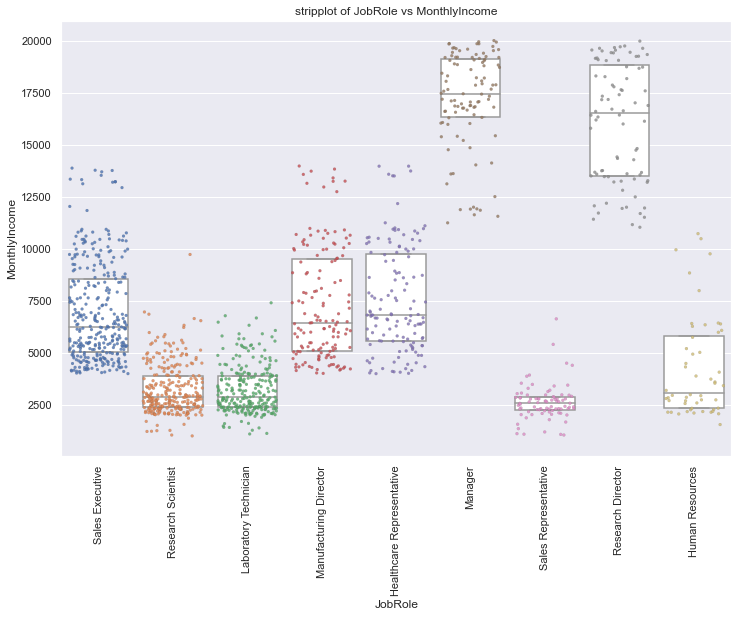

In [22]:
sns.set(rc={"figure.figsize":(12,8)})
sns.boxplot(x="JobRole",y="MonthlyIncome",data = project,color="white",showfliers=False,whis=False)
sns.stripplot(x="JobRole",y="MonthlyIncome",
              data = project,linewidth=0.1,
              jitter=0.4,s=3,dodge=False,alpha=0.8)
plt.xticks(rotation=90)
plt.title("stripplot of JobRole vs MonthlyIncome")
plt.show()

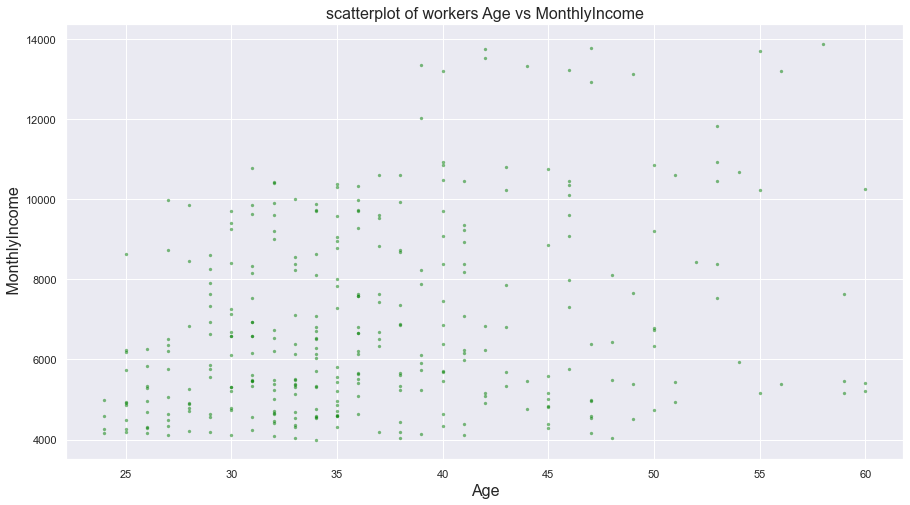

In [23]:
plt.style.use("ggplot")
sns.set(rc={"figure.figsize":(15,8)})
plt.scatter(x="Age",y="MonthlyIncome",data=project[project["JobRole"]=="Sales Executive"],marker="o",alpha=0.5,color="green",
            s=10,linewidth=0.1)
plt.ylabel(" MonthlyIncome",fontsize=16)
plt.xlabel("Age",fontsize=16)
plt.title("scatterplot of workers Age vs MonthlyIncome",fontsize=16)
plt.show()

## Heat map

<AxesSubplot:>

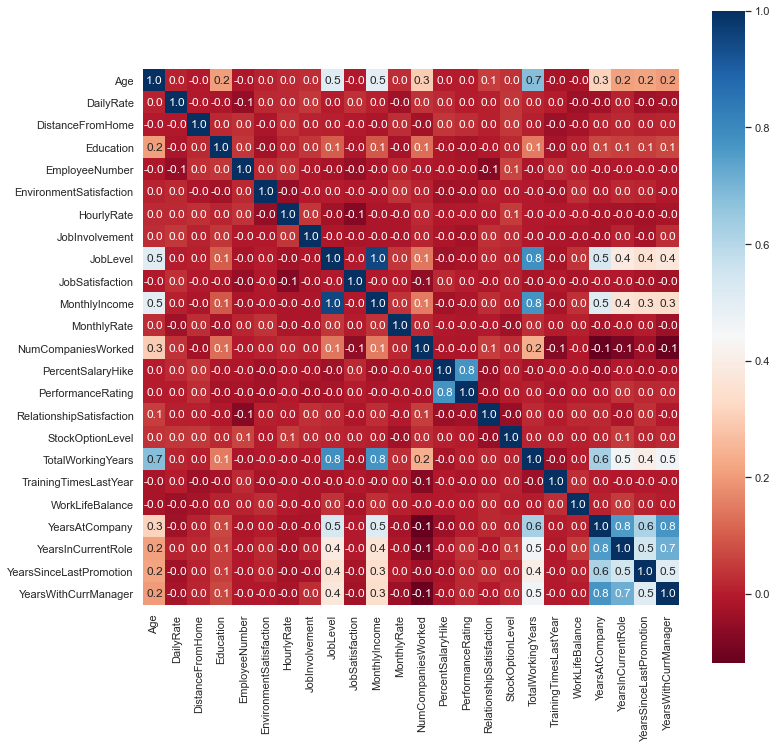

In [24]:
corr = project.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,annot=True,cmap='RdBu',fmt='.1f')


## converting categorical columns to binary 

In [25]:
project['Attrition'] = project['Attrition'].factorize(['No','Yes'])[0]
project['Gender'] = project['Gender'].factorize(['No','Yes'])[0]
project['OverTime'] = project['OverTime'].factorize(['No','Yes'])[0]
project

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


## converting catergorical columns to binary by creating dummies

In [69]:
categoric = project.select_dtypes(include='O')
project= pd.get_dummies(project, columns=[col for col in project.columns if col in categoric])
project

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,1,0,0,0,1,0,1
2,37,1,1373,2,2,4,4,1,92,2,...,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,7,1,1,40,3,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,2061,3,1,41,4,...,0,0,0,0,0,0,0,1,0,1
1466,39,0,613,6,1,2062,4,1,42,2,...,0,0,0,0,0,0,0,1,0,1
1467,27,0,155,4,3,2064,2,1,87,4,...,0,1,0,0,0,0,0,1,0,1
1468,49,0,1023,2,3,2065,4,1,63,2,...,0,0,0,0,1,0,0,1,0,1


6## Renaming the columns 

In [27]:
project.rename(columns={"Department_Human Resources":"Department_Human_Resources",
                      "Department_Research & Development":"Department_Research_Development",
                      "EducationField_Human Resources":"EducationField_Human_Resources",
                      "EducationField_Life Sciences":"EducationField_Life_Sciences",
                      "EducationField_Technical Degree":"EducationField_Technical_Degree",
                      "JobRole_Healthcare Representative":"JobRole_Healthcare_Representative",
                      "JobRole_Human Resources":"JobRole_Human_Resources",
                      "JobRole_Laboratory Technician":"JobRole_Laboratory_Technician",
                      "JobRole_Manufacturing Director":"JobRole_Manufacturing_Director",
                      "JobRole_Research Scientist":"JobRole_Research_Scientist",
                      "JobRole_Sales Executive":"JobRole_Sales_Executive",
                      "JobRole_Sales Representative":"JobRole_Sales_Representative",},inplace=True)
project.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,1,0,0,0,1,0,1
2,37,1,1373,2,2,4,4,1,92,2,...,0,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,7,1,1,40,3,...,0,0,0,0,0,0,0,1,0,1


## statsmodels to find significant features

In [28]:
model_f1 = "Attrition ~ Age + DailyRate + DistanceFromHome + Education + EmployeeNumber + EnvironmentSatisfaction+\
           MonthlyIncome + MonthlyRate + NumCompaniesWorked +  OverTime + PercentSalaryHike + PerformanceRating + RelationshipSatisfaction+\
            StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + WorkLifeBalance + YearsAtCompany + YearsInCurrentRole+\
           YearsSinceLastPromotion + YearsWithCurrManager + Department_Sales + JobRole_Manager + Over18_Y "
OLS1=smf.ols(formula=model_f1,data=project).fit()
print(OLS1.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     14.03
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.00e-48
Time:                        17:22:48   Log-Likelihood:                -467.22
No. Observations:                1470   AIC:                             982.4
Df Residuals:                    1446   BIC:                             1109.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [29]:
model_f2 = "Attrition ~ Department_Human_Resources +  EducationField_Human_Resources + EducationField_Life_Sciences+\
                     EducationField_Technical_Degree + JobRole_Healthcare_Representative + JobRole_Human_Resources + JobRole_Laboratory_Technician+\
                     JobRole_Manufacturing_Director + JobRole_Research_Scientist + JobRole_Sales_Executive + JobRole_Sales_Representative +\
                     MaritalStatus_Divorced + MaritalStatus_Married + MaritalStatus_Single +Department_Research_Development"
OLS2=smf.ols(formula=model_f2,data=project).fit()
print(OLS2.summary())

                            OLS Regression Results                            
Dep. Variable:              Attrition   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           4.34e-22
Time:                        17:22:48   Log-Likelihood:                -546.83
No. Observations:                1470   AIC:                             1124.
Df Residuals:                    1455   BIC:                             1203.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [30]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [31]:
features = project[['Age','DailyRate','DistanceFromHome','MonthlyIncome','EnvironmentSatisfaction','NumCompaniesWorked',
                    'OverTime','RelationshipSatisfaction','YearsInCurrentRole','WorkLifeBalance', 'Department_Sales',
                    'EducationField_Technical_Degree','JobRole_Human_Resources','JobRole_Laboratory_Technician',
                    'JobRole_Research_Scientist','JobRole_Sales_Representative','MaritalStatus_Single']]

In [32]:
target = project['Attrition']
accuracies = {}
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.15,random_state = 95)

In [33]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
accuracies['KNN']=x *100
print("KNN Accuracy is: ", x*100)
print(classification_report(y_test,y_pred))

KNN Accuracy is:  80.99547511312217
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       182
           1       0.36      0.10      0.16        39

    accuracy                           0.81       221
   macro avg       0.60      0.53      0.53       221
weighted avg       0.75      0.81      0.76       221



In [34]:
score = cross_val_score(knn,features,target,cv=10).mean()
print('Cross validation score: ',score)

Cross validation score:  0.8163265306122447


In [35]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.8582866293034428
knn_test_accuracy =  0.8099547511312217


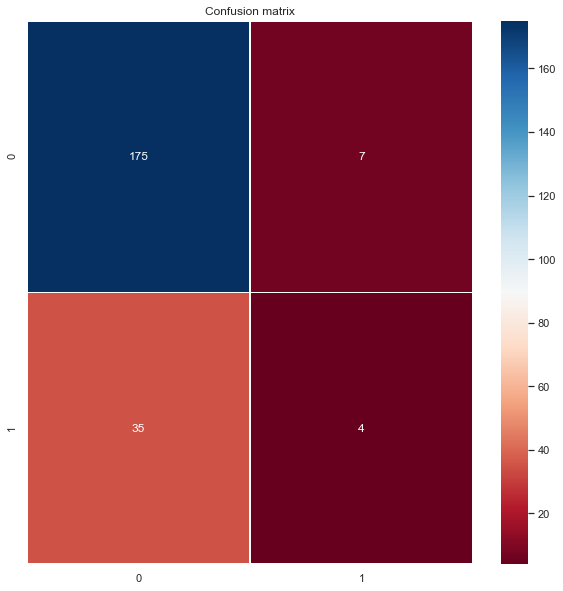

In [36]:
CM_knn = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(CM_knn, annot=True, linewidth=1.0, fmt=".0f",cmap='RdBu')
plt.title('Confusion matrix')
plt.show()

In [37]:
mean_acc = np.zeros(20)
for i in range(1,21):#Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)
mean_acc

array([0.74208145, 0.8280543 , 0.80542986, 0.81447964, 0.80995475,
       0.81447964, 0.81447964, 0.81447964, 0.81900452, 0.81447964,
       0.80542986, 0.80995475, 0.80995475, 0.81447964, 0.81447964,
       0.81447964, 0.81447964, 0.81447964, 0.81447964, 0.81447964])

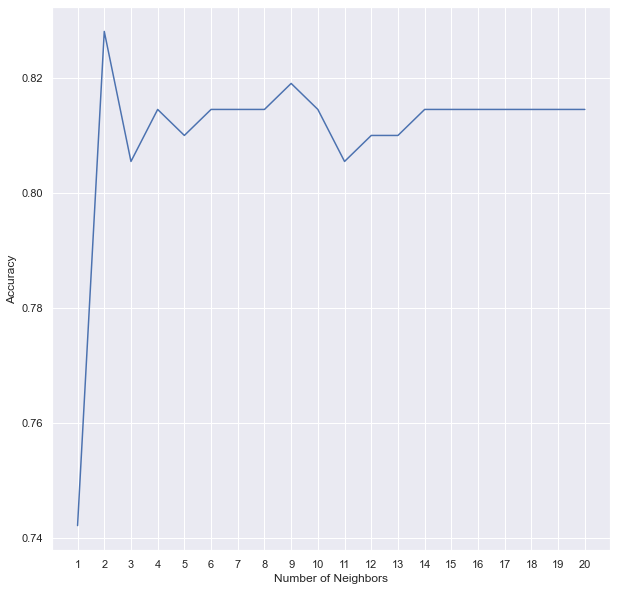

In [38]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 10))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid_params = { 'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,],
               'metric' : ['minkowski','euclidean','manhattan'],
               'weights' : ['distance','uniform']}

In [41]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    6.3s finished


In [42]:
print('the best score is', g_res.best_score_)
print('the best params are ',g_res.best_params_)

the best score is 0.84147105392609
the best params are  {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}


In [43]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 18, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=18)

In [44]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))


knn_train_accuracy =  0.844675740592474


In [45]:
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy =",knn_1.score(x_test,y_test))

knn_test_accuracy = 0.8144796380090498


#### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=3,max_depth=5)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
accuracies['Decision Tree ']= x *100
print("Decision Tree's Accuracy is: ", x*100)
print(classification_report(y_test,y_pred))

Decision Tree's Accuracy is:  82.80542986425338
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       182
           1       0.52      0.36      0.42        39

    accuracy                           0.83       221
   macro avg       0.69      0.64      0.66       221
weighted avg       0.81      0.83      0.82       221



In [47]:
score = cross_val_score(DT, features, target,cv=10).mean()
print('Cross validation score:',score)

Cross validation score: 0.8340136054421767


In [48]:
#Print Train and test Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8839071257005604
Testing accuracy =  0.8280542986425339


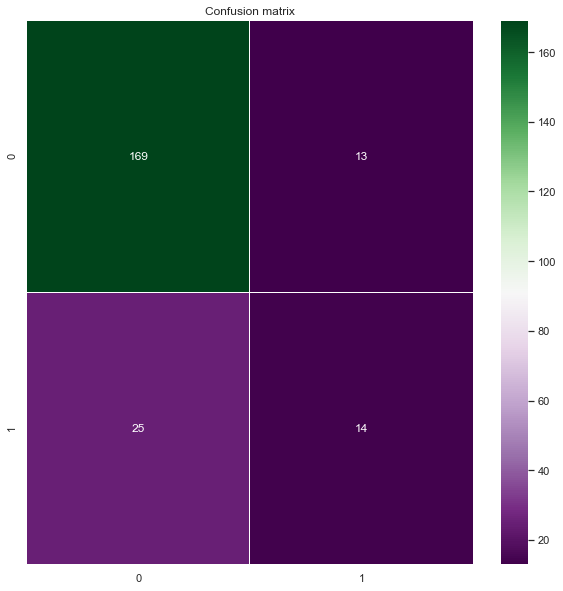

In [49]:
CM_DT = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(CM_DT, annot=True, linewidth=0.1,fmt=".0f",cmap='PRGn', ax = ax)
plt.title('Confusion matrix')
plt.show()

#### Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train,y_train)
y_pred = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
accuracies['Naive Bayes']= x*100
print("Naive Bayes Accuracy is: ", x*100)
print(classification_report(y_test,y_pred))

Naive Bayes Accuracy is:  81.90045248868778
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       182
           1       0.48      0.33      0.39        39

    accuracy                           0.82       221
   macro avg       0.67      0.63      0.64       221
weighted avg       0.80      0.82      0.81       221



In [51]:
score = cross_val_score(NaiveBayes,features,target,cv=10).mean()
print('Cross validation score: ',score)

Cross validation score:  0.8312925170068027


In [52]:
#Print Train and test Accuracy
NB_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
NB_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.8318654923939152
Testing accuracy =  0.8190045248868778


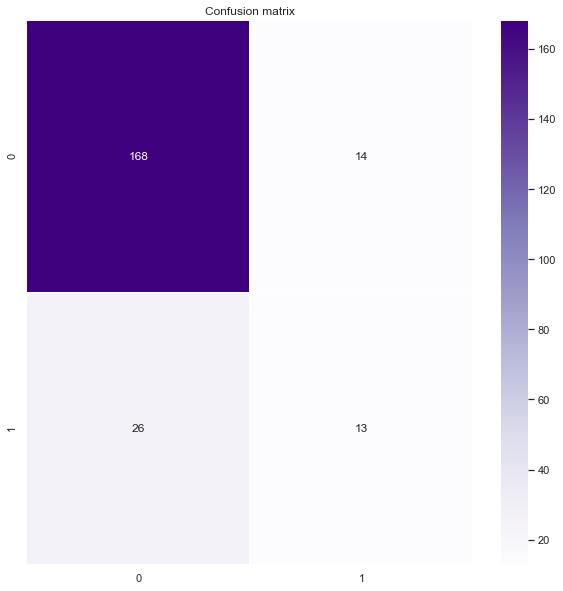

In [53]:
CM_NB = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(CM_NB, annot=True, linewidth=0.5,fmt=".0f",cmap='Purples')
plt.title('Confusion matrix')
plt.show()

#### Support vector machine

In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf') # rbf
y_pred = svc.fit(x_train, y_train).predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
accuracies['SVC']= x*100
print("Accuracy:", x*100)
print(classification_report(y_test,y_pred))

Accuracy: 82.35294117647058
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       182
           1       0.00      0.00      0.00        39

    accuracy                           0.82       221
   macro avg       0.41      0.50      0.45       221
weighted avg       0.68      0.82      0.74       221



In [55]:
score = cross_val_score(svc,features,target,cv=10).mean()
print('Cross validation score:',score)


Cross validation score: 0.8387755102040817


In [56]:
#Print Train and test Accuracy
svc_train_accuracy = svc.score(x_train,y_train)
print("Training accuracy= ",svc.score(x_train,y_train))
svc_test_accuracy= svc.score(x_test,y_test)
print("Testing accuracy= ",svc.score(x_test,y_test))

Training accuracy=  0.8414731785428343
Testing accuracy=  0.8235294117647058


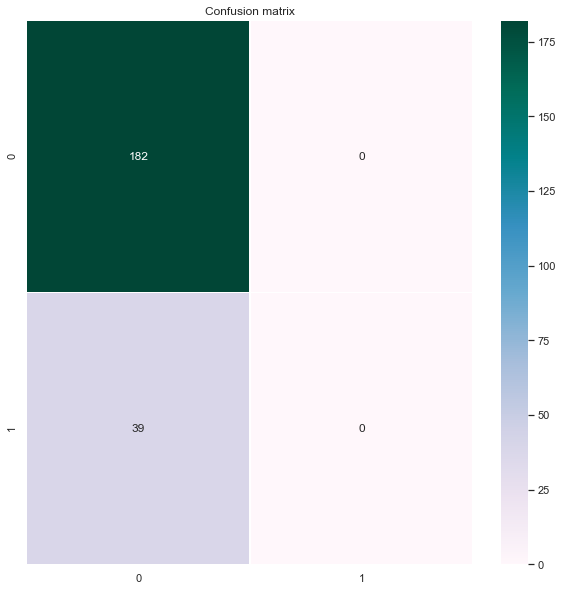

In [57]:
CM_SVC = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(CM_SVC, annot=True, linewidth=0.5, fmt=".0f",  cmap='PuBuGn')
plt.title('Confusion matrix')
plt.show()

### Random forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=10, random_state=90)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
x = metrics.accuracy_score(y_test, y_pred)
accuracies['RF']= x*100
print("Random Forest Accuracy is: ", x)
print(classification_report(y_test,y_pred))

Random Forest Accuracy is:  0.8371040723981901
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       182
           1       0.71      0.13      0.22        39

    accuracy                           0.84       221
   macro avg       0.78      0.56      0.56       221
weighted avg       0.82      0.84      0.79       221



In [59]:
score = cross_val_score(RF,features,target,cv=10).mean()
print('Cross validation score:',score)

Cross validation score: 0.8612244897959185


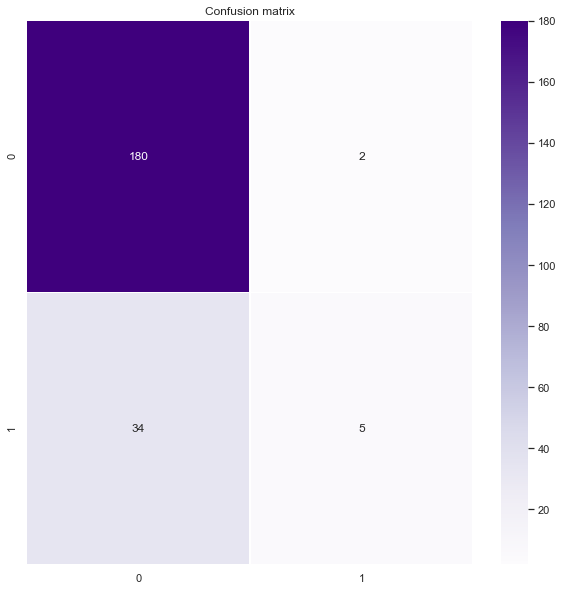

In [60]:
CM_RF = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(CM_RF, annot=True, linewidth=0.5, fmt=".0f",  cmap='Purples')
plt.title('Confusion matrix')
plt.show()

### Logistic regression

In [61]:
model_logit = 'Attrition ~ Age + DailyRate + DistanceFromHome + MonthlyIncome + EnvironmentSatisfaction + NumCompaniesWorked +\
                    OverTime + RelationshipSatisfaction + YearsInCurrentRole + WorkLifeBalance + Department_Sales +\
                    EducationField_Technical_Degree + JobRole_Human_Resources + JobRole_Laboratory_Technician +\
                    JobRole_Research_Scientist + JobRole_Sales_Representative + MaritalStatus_Single'
result = smf.logit(formula = model_logit, data = project).fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.335079
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1452
Method:                           MLE   Df Model:                           17
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.2414
Time:                        17:23:00   Log-Likelihood:                -492.57
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.872e-56
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.0067      0.668      0.010  

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)
x = metrics.accuracy_score(y_test, y_pred)
accuracies['logistic regression']= x*100


In [63]:
#Print Train and test Accuracy
model_train_accuracy = model.score(x_train,y_train)
print("Training accuracy = ",model.score(x_train,y_train))
model_test_accuracy = model.score(x_test,y_test)
print("Testing accuracy = ",model.score(x_test,y_test))

Training accuracy =  0.8438751000800641
Testing accuracy =  0.8280542986425339


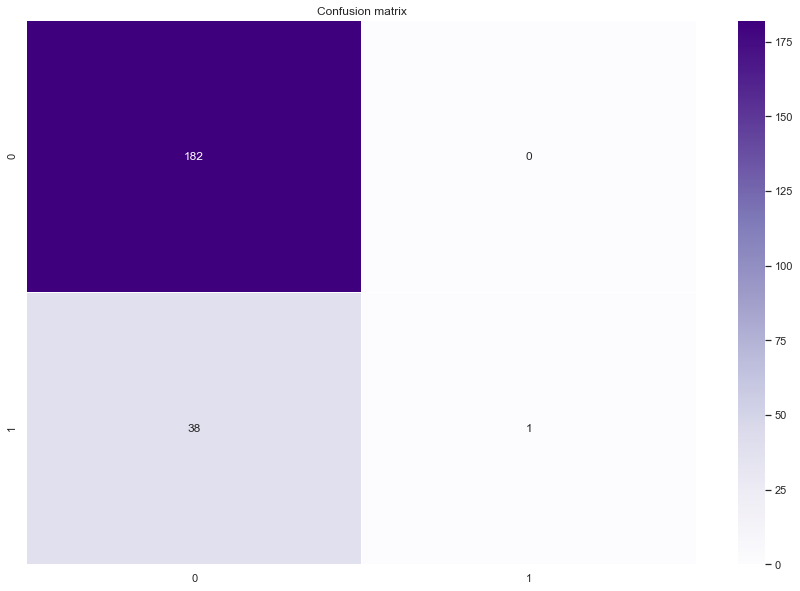

In [64]:
CM_LR = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(CM_LR, annot=True, linewidth=0.5, fmt=".0f",  cmap='Purples')
plt.title('Confusion matrix')
plt.show()

### Comparing models

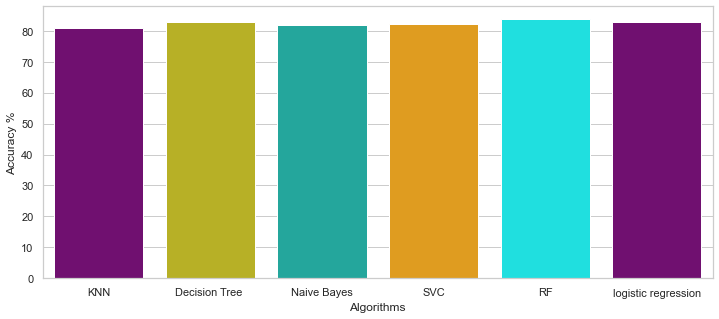

In [65]:
colors = ["purple", "#CFC60E","#0FBBAE",'orange','cyan']
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

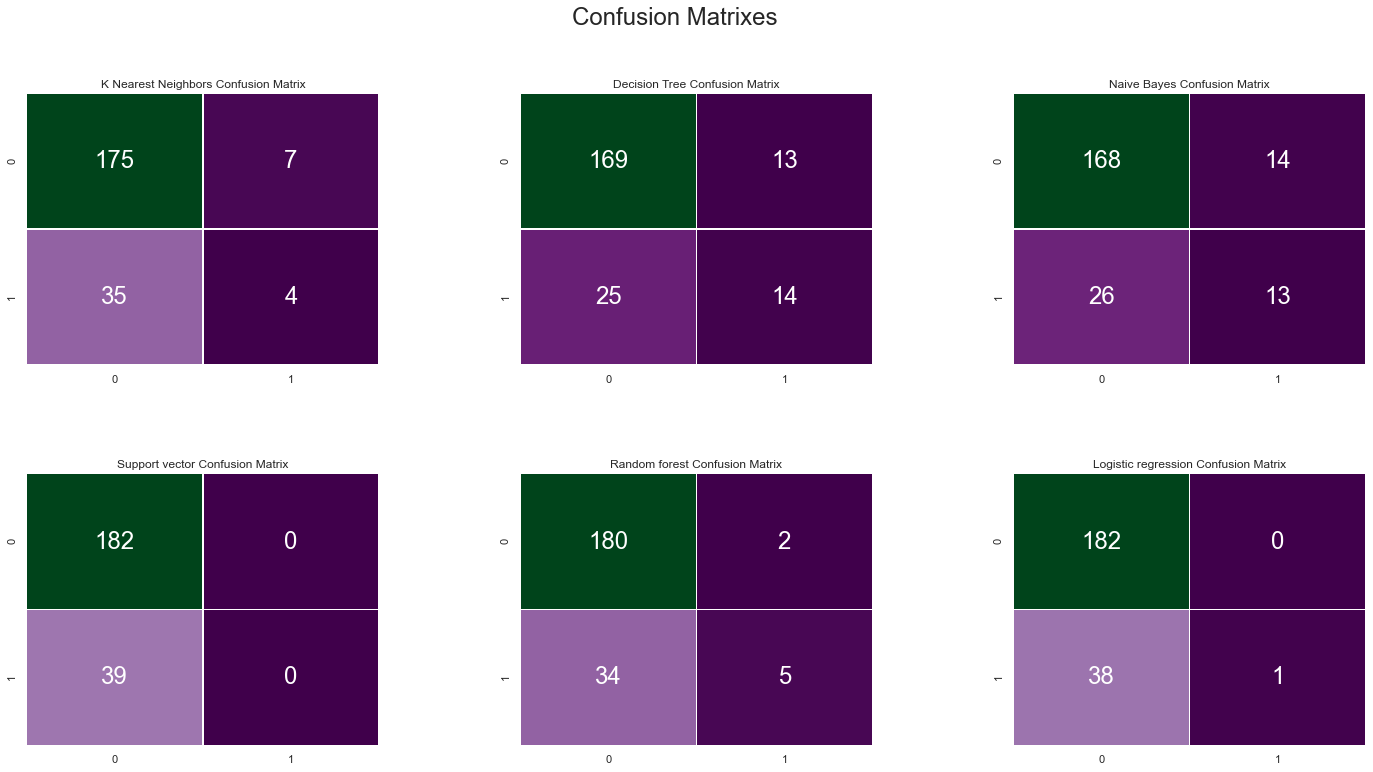

In [66]:
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(CM_knn,annot=True,cmap="PRGn",fmt=".0f",cbar=False, annot_kws={"size": 24},linewidth=0.5)

plt.subplot(2,3,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(CM_DT,annot=True,cmap="PRGn",fmt=".0f",cbar=False, annot_kws={"size": 24},linewidth=0.5)

plt.subplot(2,3,3)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(CM_NB,annot=True,cmap="PRGn",fmt=".0f",cbar=False, annot_kws={"size": 24},linewidth=0.5)

plt.subplot(2,3,4)
plt.title("Support vector Confusion Matrix")
sns.heatmap(CM_SVC,annot=True,cmap="PRGn",fmt=".0f",cbar=False, annot_kws={"size": 24},linewidth=0.5)

plt.subplot(2,3,5)
plt.title("Random forest Confusion Matrix")
sns.heatmap(CM_RF,annot=True,cmap="PRGn",fmt=".0f",cbar=False, annot_kws={"size": 24},linewidth=0.5)

plt.subplot(2,3,6)
plt.title("Logistic regression Confusion Matrix")
sns.heatmap(CM_LR,annot=True,cmap="PRGn",fmt=".0f",cbar=False, annot_kws={"size": 24},linewidth=0.5)
plt.show()